In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# Load data
file_path = '/home/data3/Ali/Code/Moghis/Train-data-preprocessed-2.xlsx'
data = pd.read_excel(file_path)


In [2]:
# Define features and target
features = [
    'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03',
    'migration_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03',
    'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03',
    'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03',
    'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03',
    'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03',
    'cancer_03', 'n_illnesses_03', 'exer_3xwk_03', 'alcohol_03', 'tobacco_03', 'test_chol_03',
    'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03',
    'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03',
    'insured_03', 'decis_personal_03', 'employment_03', 'age_12', 'urban_12', 'married_12',
    'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
    'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12',
    'iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12',
    'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12',
    'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 'diabetes_12',
    'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12',
    'bmi_12', 'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12',
    'test_diab_12', 'test_pres_12', 'hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12',
    'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12',
    'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 'vax_pneu_12', 'seg_pop_12',
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12',
    'sewing_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12',
    'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
    'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03',
    'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
    'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12',
    'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
    'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'hincome_change',
    'niadl_change', 'adl_change', 'depr_change', 'glob_hlth_change', 'edu_gru_change',
    'illnesses_change'
    ]
target = 'composite_score'

# Drop rows with missing values for simplicity (optional)
data = data.dropna(subset=features + [target])

######################## Process Train Data ####################
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[features] = data[features].fillna(data[features].mean())
data = data.dropna(subset=[target])


# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

Top 10 important features:
Feature 60: Importance 0.0
Feature 61: Importance 0.0
Feature 176: Importance 0.0
Feature 162: Importance 8.028243005319943e-06
Feature 157: Importance 5.531120207448136e-05
Feature 165: Importance 0.0006316823509736009
Feature 29: Importance 0.002923087073016485
Feature 77: Importance 0.07647623380331144
Feature 72: Importance 0.2061003823839497
Feature 57: Importance 0.7138052749436691


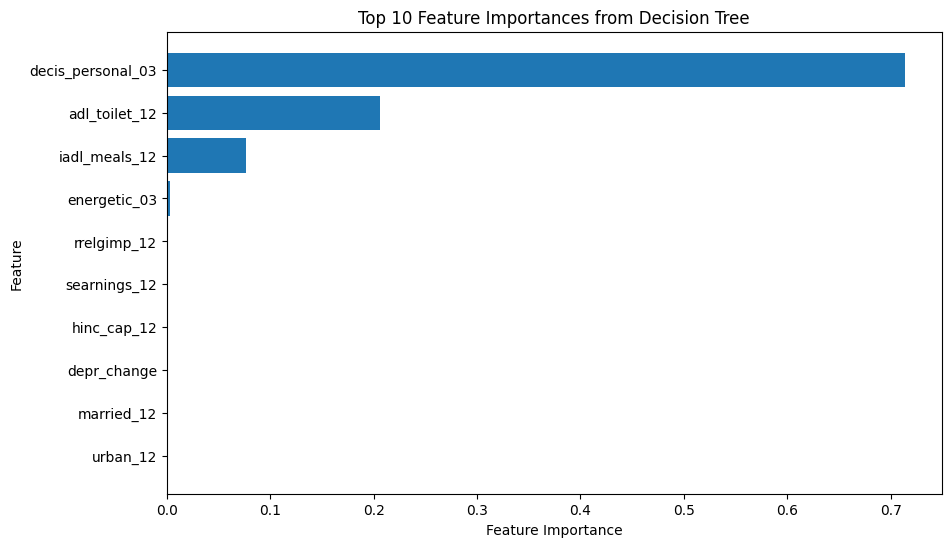

Cross-validation Accuracy Scores: [0.93210587 0.93095512 0.96202532 0.92741935 0.93548387]
Mean Accuracy: 0.9375979063810831


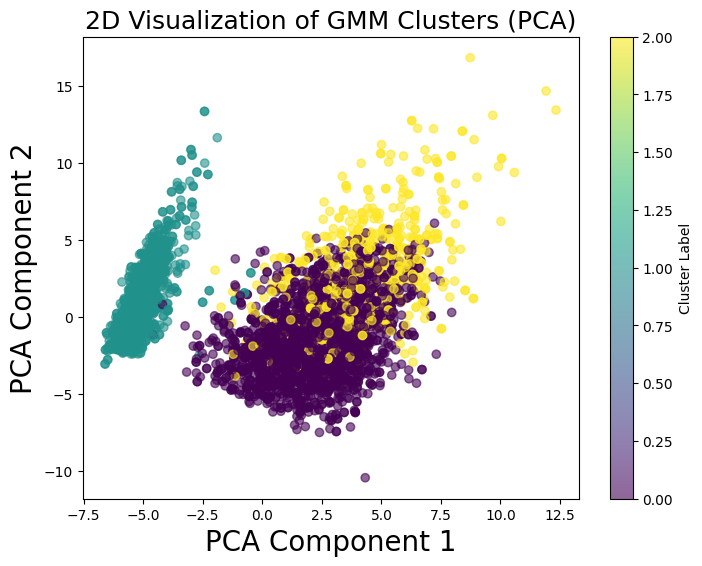

In [22]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X_scaled = scaled_features

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, random_state=42)
dt.fit(X_scaled, gmm_labels)

# Feature Importance Analysis
importances = dt.feature_importances_
top_features_indices = np.argsort(importances)[-10:]  # Top 10 features
print("Top 10 important features:")
for idx in top_features_indices:
    print(f"Feature {idx}: Importance {importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices)), importances[top_features_indices], tick_label=np.array(data.columns)[top_features_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.show()

# Cross-validation scores
scores = cross_val_score(dt, X_scaled, gmm_labels, cv=5)
print(f"Cross-validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)}")

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.title('2D Visualization of GMM Clusters (PCA)',fontsize=18)
plt.xlabel('PCA Component 1', fontsize=20)
plt.ylabel('PCA Component 2',fontsize=20)
plt.show()


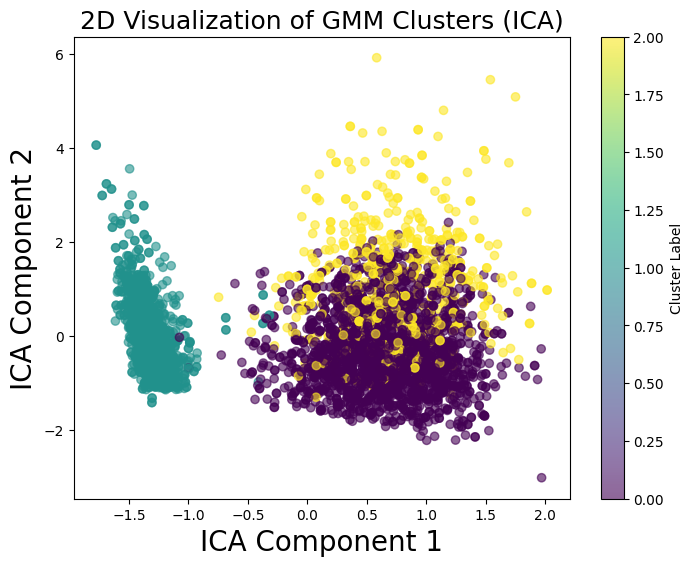

In [21]:
# Apply t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
# X_2d = tsne.fit_transform(scaled_features)

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_2d = ica.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.title('2D Visualization of GMM Clusters (ICA)',fontsize=18)
plt.xlabel('ICA Component 1',fontsize=20)
plt.ylabel('ICA Component 2',fontsize=20)
plt.show()


/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


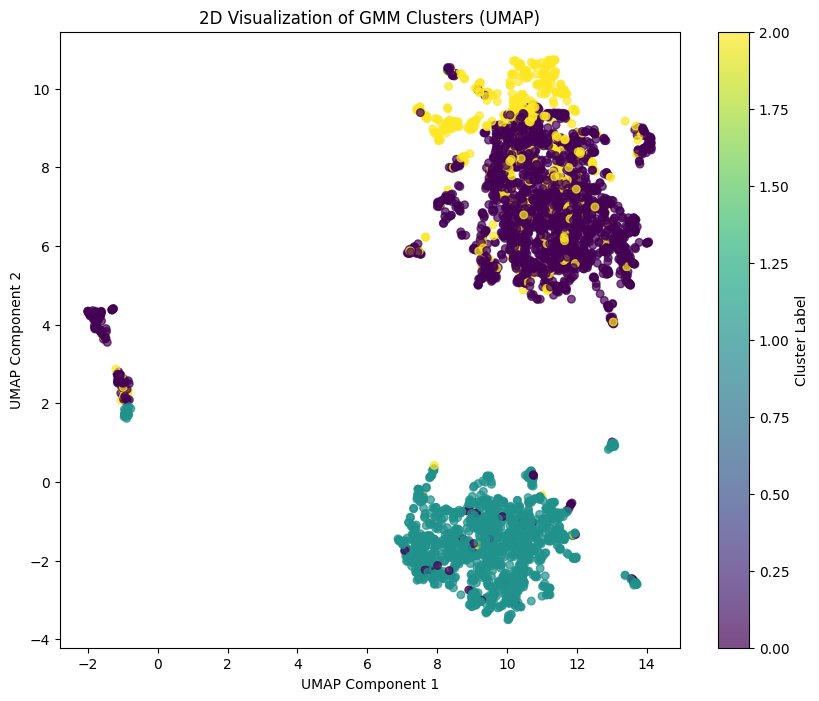

In [12]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

X_scaled = scaled_features

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Reduce dimensions with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plot the 2D visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('2D Visualization of GMM Clusters (UMAP)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()
